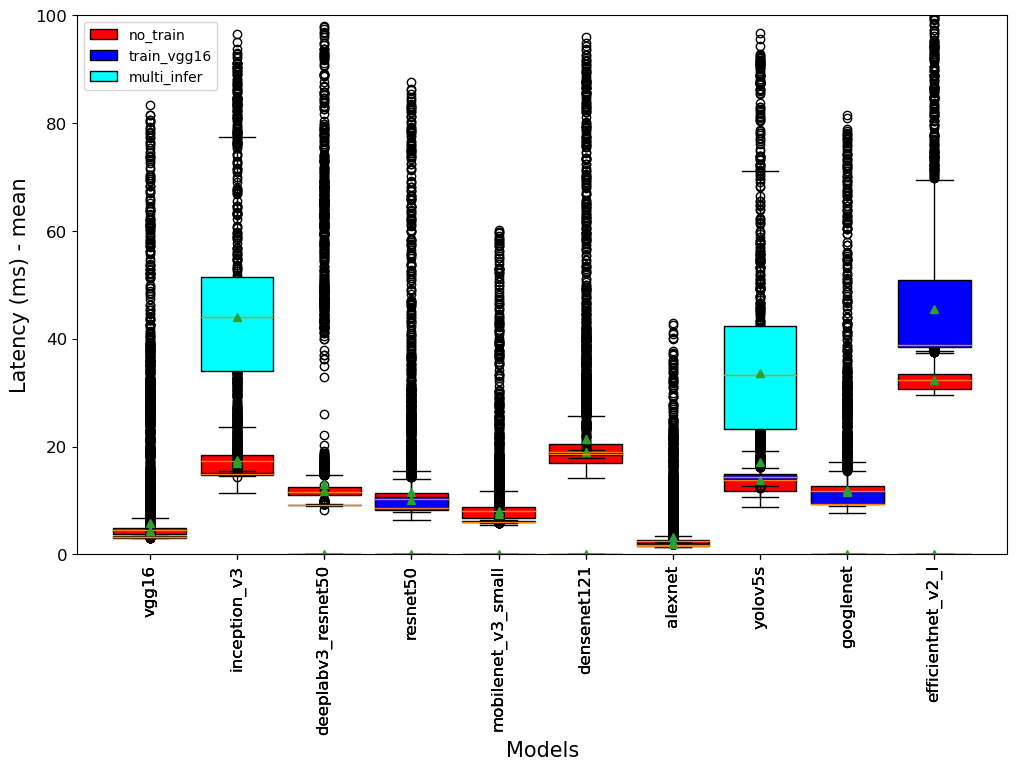

In [160]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        prefix, model_name, suffix = re.findall(r'(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

def plot_box(data,mode,fill_color):
    col=cols
    plot_interval =0.5
    for i in range(len(col)):
        y= data[col[i]]
        bp = ax.boxplot(y, widths= plot_interval, positions = [i*(plot_interval+0.1)],\
                        labels = [col[i]],showmeans=True, patch_artist=True,)
        for patch in bp['boxes']:  ## props: ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']
            patch.set(facecolor=fill_color)   
    plt.xticks(fontsize= 12, rotation = 90)  #set label size
    plt.yticks(fontsize= 12)  #set label size
# #     median, mean = np.median(y), np.mean(y)
# #     plt.text(i*(plot_interval+0.1)+0.05,median*1, '%0.1f'%median, color= 'brown')#     
    plt.ylim(0, 100)
    return bp["boxes"][0] # return box for ploting

## main
root = '/home/royliu/Documents/profile_train_infer/result/data/10rps'
fill_colors=['red','blue','cyan']
fig, ax = plt.subplots(1,1, figsize=(12,7))
mode_list = []
bp_box_list =[]
for i, mode in enumerate(os.listdir(root)):
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    bx= plot_box(data, mode,fill_color)
    bp_box_list.append(bx)
    mode_list.append(mode)
    
plt.legend(bp_box_list,mode_list, loc = 'best')
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) - '+value_type, fontsize= 15) 
plt.show()



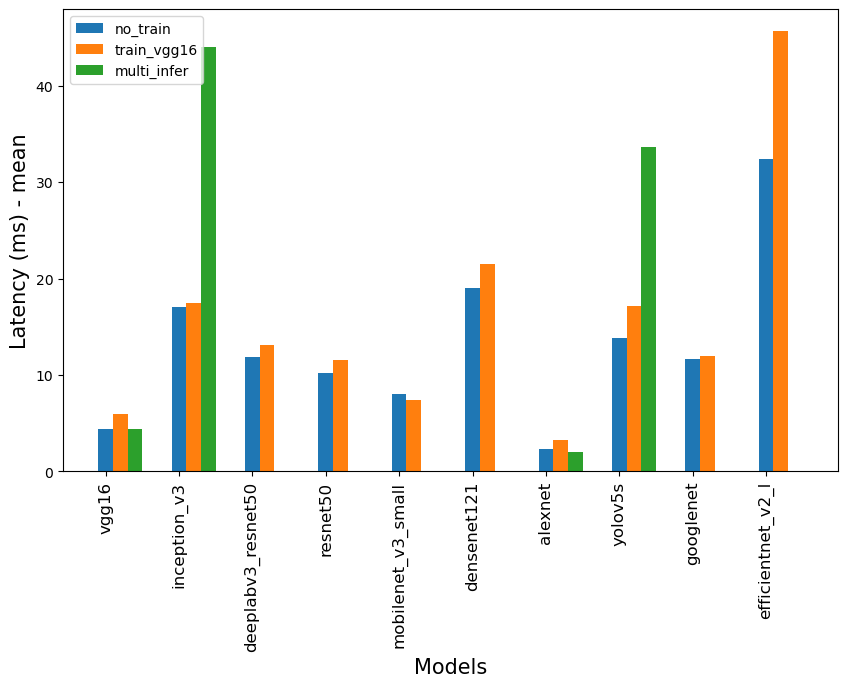

In [169]:
## bar plot
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        prefix, model_name, suffix = re.findall(r'(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

root = '/home/royliu/Documents/profile_train_infer/result/data/10rps'
fill_colors=['red','blue','cyan']
fig, ax = plt.subplots(1,1, figsize=(10,6))
mode_list = []
bp_box_list =[]
value_type = 'mean'
def plot_bar(data, cols, value_type='median'):
    col=cols
    for model in col:
        y = data[model].to_list()
        median, mean = np.median(y), np.mean(y)
        medians.append(median)
        means.append(mean)
    values = medians if value_type == 'median' else means
    x_axis= np.arange(len(col))    
    plt.bar(x_axis+i*.2, values, width =0.2, label=mode) 
    mode_list.append(mode)

## main
for i, mode in enumerate(os.listdir(root)):
    medians, means = [], []
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    plot_bar(data, cols, value_type)
    
plt.xticks(x_axis, col, fontsize= 12, rotation = 90)
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) - '+value_type, fontsize= 15) 
plt.legend(mode_list, loc=2)
plt.show()